# GA Data Science 25 

### Dimensionality Reduction and Principal Component Analysis (PCA)

In [1]:
# usual imports
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd
%matplotlib inline
# scikit-learn algorithms
from sklearn.decomposition import PCA

###Iris Dataset (i.e. scikit-learn iris)  
Load the sklearn `iris` dataset.  This is one of the built-in datasets included in scikit-learn (and one we've seen before).

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

Take a look at the dataset:

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
#print iris

In [4]:
X = iris.data
y = iris.target
target_names = iris.target_names

The PCA algorithm takes an argument `n_components` which specifyies how many of the principal components we want to keep.  This dataset has only 4 features, so let's try keeping 2 to start: 

In [5]:
# create the model and fit the data
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [7]:
# Percentage of variance explained (first two components):
print ("First component: " + str(pca.explained_variance_ratio_[0]))
print ("Second component: " + str(pca.explained_variance_ratio_[1]))

First component: 0.9246187232017271
Second component: 0.05306648311706783


We can see that the first principal component explains most of the variance.  Since we kept only 2 components we can use a simple 2-dimensional plot to view the datapoints in the new coordinate system.  We'll label them using our known target info:

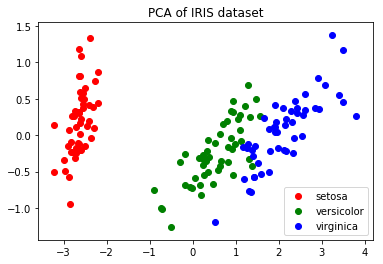

In [9]:
pl.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    pl.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
pl.legend()
pl.title('PCA of IRIS dataset')
pl.show()


We can use a scree plot to help validate our choice of `n`.  Let's refit the model, but this time keep all components - this is the default behavior if `n_components` is not specified:

In [10]:
# create the model and fit the data - no n_components set:
pca = PCA()
X_r = pca.fit(X).transform(X)

As before, the explained variance ratios are in `pca.explained_variance_ratio_`, but this time there should be 4 ...

In [12]:
ratios = pca.explained_variance_ratio_
ratios

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [13]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [13]:
#print X_r

Text(0, 0.5, 'Eigenvalue')

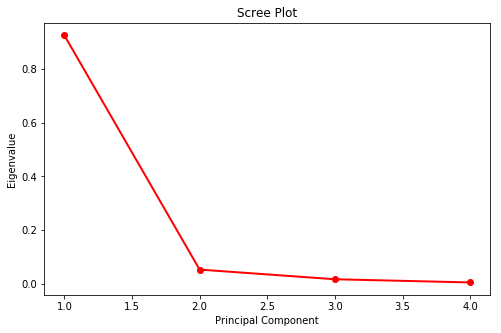

In [14]:
comp_id = [1, 2, 3, 4]             # id number of component
fig = plt.figure(figsize=(8,5))
plt.plot(comp_id, ratios, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')


There is a clear 'elbow in the curve', so it looks like our choice of `2` components was ok.  Let's look at another dataset that has more features per record.  

###Handwritten Digits Dataset (i.e. scikit-learn digits)  

Load the sklearn `digits` dataset, which contains a set of 8x8 pixel images of handwritten digits.  This is one of the built-in datasets included in scikit-learn.

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()

Take a look at the dataset:

In [16]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

Notice that each row in the dataset has 64 features, one for each of the individual pixels making up the image, where the value of each feature is the greyscale level (0 to 15).

In [16]:
# print digits

In [17]:
X, y = digits.data, digits.target

print("data shape: %r, target shape: %r" % (X.shape, y.shape))
print("classes: %r" % list(np.unique(y)))

data shape: (1797, 64), target shape: (1797,)
classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [18]:
n_samples, n_features = X.shape
print("n_samples=%d" % n_samples)
print("n_features=%d" % n_features)

n_samples=1797
n_features=64


In [24]:
# helper function for plotting images
# ref: ogrisel

def plot_gallery(data, labels, shape, interpolation='nearest'):
    for i in range(data.shape[0]):
        plt.subplot(1, data.shape[0], (i + 1))
        plt.imshow(data[i].reshape(shape), interpolation=interpolation, cmap=pl.cm.binary)
        plt.title(labels[i])
        plt.xticks(()), plt.yticks(())

In [25]:
subsample = np.random.permutation(X.shape[0])[:4]      # pick 4 random records 
images = X[subsample]
labels = ['True class: %d' % l for l in y[subsample]]  # label with the true (known) value
plot_gallery(images, labels, shape=(8, 8))             # plot them in grayscale

In [29]:
# run normal PCA
X, y = digits.data, digits.target

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

ratios = pca.explained_variance_ratio_
ratios

array([0.14890594, 0.13618771])

In [30]:
from itertools import cycle

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['+', 'o', '^', 'v', '<', '>', 'D', 'h', 's']
for i, c, m in zip(np.unique(y), cycle(colors), cycle(markers)):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1],
        c=c, marker=m, label=i, alpha=0.5)
    
_ = plt.legend(loc='best')

What do these components look like?

In [31]:
labels = ['Component #%d' % i for i in range(len(pca.components_))]
plot_gallery(pca.components_, labels, shape=(8, 8))

Was 2 a good choice - i.e. can we capture enough of the variance with just 2 components?  Let's see what the rest would have looked like:

In [32]:
# create the model and fit the data - no n_components set:
X, y = digits.data, digits.target

pca = PCA()
X_r = pca.fit(X).transform(X)

ratios = pca.explained_variance_ratio_
ratios

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

As before, a scree plot can help us pick a good n.

Text(0, 0.5, 'Eigenvalue')

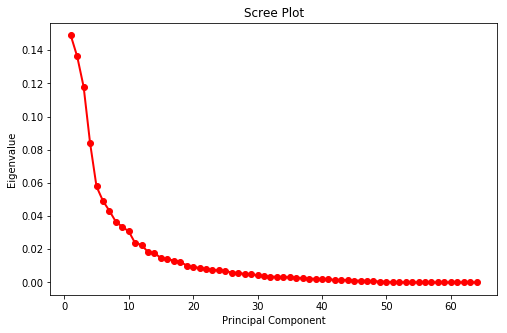

In [33]:
comp_id = [i + 1 for i in range(64)]             # ids of components
fig = plt.figure(figsize=(8,5))
plt.plot(comp_id, ratios, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

Based on this plot we would probably want to set `n_components` to somewhere around 10 - 12 for a good tradeoff between model complexity and coverage of the variance.        

In [34]:
X_r

array([[-1.25946645e+00,  2.12748835e+01, -9.46305462e+00, ...,
        -1.28189897e-30,  3.45126646e-31, -6.91392699e-16],
       [ 7.95761130e+00, -2.07686990e+01,  4.43950604e+00, ...,
         4.48764028e-16,  1.87897716e-15,  1.67046393e-16],
       [ 6.99192297e+00, -9.95598641e+00,  2.95855808e+00, ...,
        -3.58761317e-16, -8.02803965e-16,  1.16654252e-16],
       ...,
       [ 1.08012837e+01, -6.96025223e+00,  5.59955453e+00, ...,
        -6.19446017e-16, -2.32905097e-15,  9.70809841e-17],
       [-4.87210009e+00,  1.24239536e+01, -1.01708664e+01, ...,
         1.65416079e-16,  6.58922163e-16, -1.23762878e-16],
       [-3.44389631e-01,  6.36554919e+00,  1.07737085e+01, ...,
        -5.45684302e-16, -3.60884386e-16,  2.70670966e-16]])

### A Few More Examples: 

1. 'Favorite Style '

2. 'Cool kids in high school'

3. [Congressional Ideology](https://www.govtrack.us/about/analysis#ideology](https://www.govtrack.us/about/analysis#ideology)

refs:

Other PCA notebooks: [ogrisel](http://nbviewer.ipython.org/github/ogrisel/parallel_ml_tutorial/blob/master/notebooks/02%20-%20Model%20Selection%20and%20Assessment.ipynb) , [anfibil](http://nbviewer.ipython.org/github/anfibil/cse40647.sp14/blob/master/8%20-%20Dimensionality%20Reduction.ipynb)
